In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [ ]:
class_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Hourse', 'Ship', 'Truck']


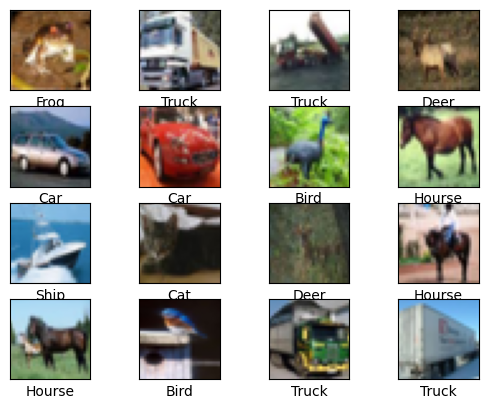

In [ ]:
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(training_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[training_labels[i][0]])

plt.show()

In [ ]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 7.0 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import pydot
import visualkeras
from PIL import ImageFont
from tensorflow.keras.utils import plot_model
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

try:
    font = ImageFont.truetype("arial.ttf", 24)
except IOError:
    font = ImageFont.load_default()


# Visualize the model
visualkeras.layered_view(model, legend=True, font=font).show()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 1024)             

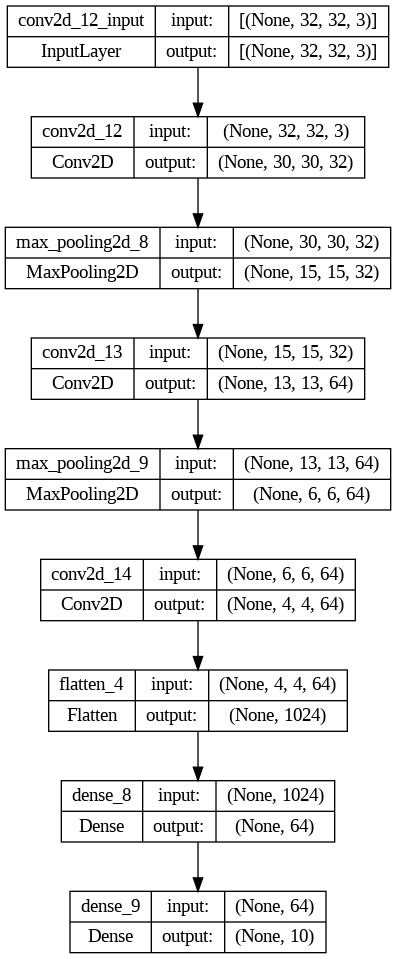

In [ ]:
import pydot
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Visualize the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


Epoch 1/20
1563/1563 [==============================] - 79s 50ms/step - loss: 0.4983 - accuracy: 0.8230 - val_loss: 0.9450 - val_accuracy: 0.7065
Epoch 2/20
1563/1563 [==============================] - 72s 46ms/step - loss: 0.4746 - accuracy: 0.8330 - val_loss: 1.0205 - val_accuracy: 0.6976
Epoch 3/20
1563/1563 [==============================] - 82s 53ms/step - loss: 0.4561 - accuracy: 0.8378 - val_loss: 0.9979 - val_accuracy: 0.7052
Epoch 4/20
1563/1563 [==============================] - 75s 48ms/step - loss: 0.4384 - accuracy: 0.8436 - val_loss: 1.0099 - val_accuracy: 0.7075
Epoch 5/20
1563/1563 [==============================] - 73s 47ms/step - loss: 0.4223 - accuracy: 0.8492 - val_loss: 1.0607 - val_accuracy: 0.6918
Epoch 6/20
1563/1563 [==============================] - 74s 47ms/step - loss: 0.4023 - accuracy: 0.8563 - val_loss: 1.1019 - val_accuracy: 0.6820
Epoch 7/20
1563/1563 [==============================] - 70s 44ms/step - loss: 0.3923 - accuracy: 0.8587 - val_loss: 1.1095 -

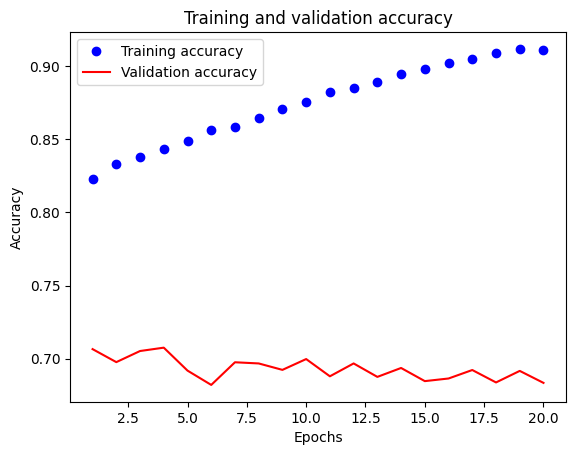

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(training_images, training_labels, epochs=20, validation_data=(testing_images, testing_labels))

# Extracting accuracy and validation accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting accuracy and validation accuracy
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(testing_images, testing_labels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 [==============================] - 5s 14ms/step - loss: 0.8968 - accuracy: 0.7130
Loss: 0.8967564702033997
Accuracy: 0.7129999995231628


1/1 [==============================] - 0s 467ms/step


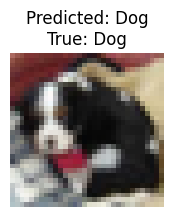

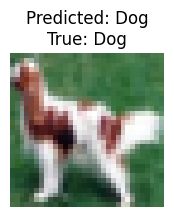

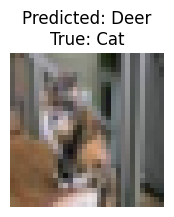

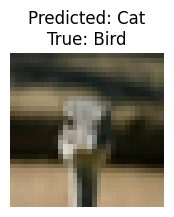

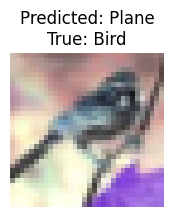

In [ ]:
sample_indices = np.random.choice(len(testing_labels), size=5, replace=False)
sample_images = testing_images[sample_indices]

# Make predictions
predictions = model.predict(sample_images)

# Display the predictions and true labels
for i in range(len(sample_indices)):
    plt.figure(figsize=(2, 2))
    plt.imshow(sample_images[i])
    predicted_class = class_names[np.argmax(predictions[i])]
    true_class = class_names[testing_labels[sample_indices[i]][0]]
    plt.title(f"Predicted: {predicted_class}\nTrue: {true_class}")
    plt.axis('off')
    plt.show()